<img src=https://github.com/numpy/numpy/raw/main/branding/logo/primary/numpylogo.svg width=250 alt="NumPy Logo"></img>
# Intermediate NumPy
---

## Overview
1. Working with multiple dimensions
1. Subsetting of irregular arrays with booleans
1. Sorting, or indexing with indices

## Prerequisites

| Concepts | Importance | Notes |
| --- | --- | --- |
| [NumPy Basics](numpy-basics) | Necessary | |

* **Time to learn**: 20 minutes
---

## Imports
We will be including [Matplotlib](../matplotlib) to illustrate some of our examples, but you don't need knowledge of it to complete this notebook.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Using axes to slice arrays

Here we introduce an important concept when working with NumPy: the axis. This indicates the particular dimension along which a function should operate (provided the function does something taking multiple values and converts to a single value). 

Let's look at a concrete example with `sum`:

In [2]:
a = np.arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

This calculates the total of all values in the array.

In [3]:
np.sum(a)

66

<div class="admonition alert alert-info">
    <p class="title" style="font-weight:bold">Info</p>
    Some of NumPy's functions can be accessed as `ndarray` methods!
</div>

In [4]:
a.sum()

66

Now, with a reminder about how our array is shaped,

In [5]:
a.shape

(3, 4)

we can specify `axis` to get _just_ the sum across each of our rows.

In [6]:
np.sum(a, axis=0)

array([12, 15, 18, 21])

Or do the same and take the sum across columns:

In [7]:
np.sum(a, axis=1)

array([ 6, 22, 38])

After putting together some data and introducing some more advanced calculations, let's demonstrate a multi-layered example: calculating temperature advection. If you're not familiar with this (don't worry!), we'll be looking to calculate

\begin{equation*}
\text{advection} = -\vec{v} \cdot \nabla T
\end{equation*}

and to do so we'll start with some random $T$ and $\vec{v}$ values,

In [8]:
temp = np.random.randn(100, 50)
u = np.random.randn(100, 50)
v = np.random.randn(100, 50)

We can calculate the `np.gradient` of our new $T(100x50)$ field as two separate component gradients,

In [9]:
gradient_x, gradient_y = np.gradient(temp)

In order to calculate $-\vec{v} \cdot \nabla T$, we will use `np.dstack` to turn our two separate component gradient fields into one multidimensional field containing $x$ and $y$ gradients at each of our $100x50$ points,

In [10]:
grad_vectors = np.dstack([gradient_x, gradient_y])
print(grad_vectors.shape)

(100, 50, 2)


and then do the same for our separate $u$ and $v$ wind components,

In [11]:
wind_vectors = np.dstack([u, v])
print(wind_vectors.shape)

(100, 50, 2)


Finally, we can calculate the dot product of these two multidimensional fields of wind and temperature gradient components by hand as an element-wise multiplication, `*`, and then a `sum` of our separate components at each point (i.e., along the last `axis`),

In [12]:
advection = (wind_vectors * -grad_vectors).sum(axis=-1)
print(advection.shape)

(100, 50)


## Indexing arrays with boolean values

### Array comparisons
NumPy can easily create arrays of boolean values and use those to select certain values to extract from an array

In [13]:
# Create some synthetic data representing temperature and wind speed data
np.random.seed(19990503)  # Make sure we all have the same data
temp = 20 * np.cos(np.linspace(0, 2 * np.pi, 100)) + 50 + 2 * np.random.randn(100)
speed = np.abs(
    10 * np.sin(np.linspace(0, 2 * np.pi, 100)) + 10 + 5 * np.random.randn(100)
)

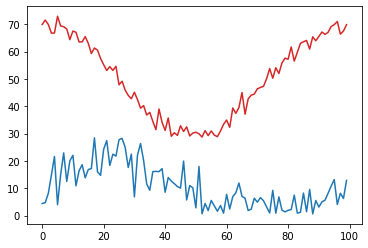

In [14]:
plt.plot(temp, 'tab:red')
plt.plot(speed, 'tab:blue');

By doing a comparison between a NumPy array and a value, we get an
array of values representing the results of the comparison between
each element and the value

In [15]:
temp > 45

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

This, which is its own NumPy array of `boolean` values, can be used as an index to another array of the same size. We can even use it as an index within the original `temp` array we used to compare,

In [16]:
temp[temp > 45]

array([69.89825854, 71.52313905, 69.90028363, 66.73828667, 66.77980233,
       72.91468564, 69.34603239, 69.09533591, 68.27350814, 64.33916721,
       67.49497791, 67.05282372, 63.51829518, 63.54034678, 65.46576463,
       62.99683836, 59.27662304, 61.29361272, 60.51641586, 57.46048995,
       55.19793004, 53.07572989, 54.47998158, 53.09552107, 54.59037269,
       47.84272747, 49.1435589 , 45.87151534, 45.11976794, 45.009292  ,
       46.36021141, 46.87557425, 47.25668992, 50.09599544, 53.77789358,
       50.24073197, 54.07629059, 51.95065202, 55.84827794, 57.56967086,
       57.19572063, 61.67658285, 56.51474577, 59.72166924, 62.99403256,
       63.57569453, 64.05984232, 60.88258643, 65.37759899, 63.94115754,
       65.53070256, 67.15175649, 66.26468701, 67.03811793, 69.17773618,
       69.83571708, 70.99586742, 66.34971928, 67.49905207, 69.83593609])

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
    This only returns the values from our original array meeting the indexing conditions, nothing more! Note the size,
</div>

In [17]:
temp[temp > 45].shape

(60,)

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Warning</p>
    Indexing arrays with arrays requires them to be the same size!
</div>

If we store this array somewhere new,

In [18]:
temp_45 = temp[temp > 45]

In [19]:
temp_45[temp < 45]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 60 but corresponding boolean dimension is 100

We find that our original `(100,)` shape array is too large to subset our new `(60,)` array.

If their sizes _do_ match, the boolean array can come from a totally different array!

In [20]:
speed > 10

array([False, False, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
        True])

In [21]:
temp[speed > 10]

array([66.73828667, 66.77980233, 69.34603239, 69.09533591, 68.27350814,
       64.33916721, 67.49497791, 67.05282372, 63.51829518, 63.54034678,
       65.46576463, 62.99683836, 59.27662304, 61.29361272, 60.51641586,
       57.46048995, 55.19793004, 53.07572989, 54.47998158, 53.09552107,
       54.59037269, 47.84272747, 49.1435589 , 45.87151534, 43.95971516,
       42.72814762, 42.45316175, 39.2797517 , 40.23351938, 36.77179678,
       34.43329229, 31.42277612, 38.97505745, 34.10549575, 35.70826448,
       29.01276068, 30.31180935, 29.31602671, 32.84580454, 30.76695309,
       29.11344716, 30.16652571, 29.91513049, 39.51784389, 69.17773618,
       69.83571708, 69.83593609])

### Replacing values
To extend this, we can use this conditional indexing to _assign_ new values to certain positions within our array, somewhat like a masking operation.

In [22]:
# Make a copy so we don't modify the original data
temp2 = temp.copy()
speed2 = speed.copy()

# Replace all places where speed is <10 with NaN (not a number)
temp2[speed < 10] = np.nan
speed2[speed < 10] = np.nan

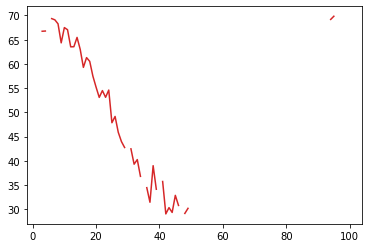

In [23]:
plt.plot(temp2, 'tab:red');

and to put this in context,

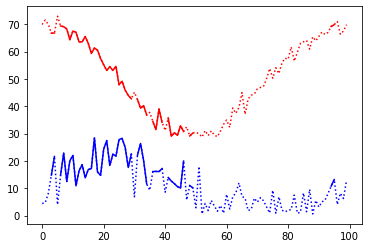

In [24]:
plt.plot(temp, 'r:')
plt.plot(temp2, 'r')
plt.plot(speed, 'b:')
plt.plot(speed2, 'b');

If we use parentheses to preserve the order of operations, we can combine these conditions with other bitwise operators like the `&` for `bitwise_and`,

In [25]:
multi_mask = (temp < 45) & (speed > 10)
multi_mask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [26]:
temp[multi_mask]

array([43.95971516, 42.72814762, 42.45316175, 39.2797517 , 40.23351938,
       36.77179678, 34.43329229, 31.42277612, 38.97505745, 34.10549575,
       35.70826448, 29.01276068, 30.31180935, 29.31602671, 32.84580454,
       30.76695309, 29.11344716, 30.16652571, 29.91513049, 39.51784389])

Heat index is only defined for temperatures >= 80F and relative humidity values >= 40%. Using the data generated below, we can use boolean indexing to extract the data where heat index has a valid value.

In [27]:
# Here's the "data"
np.random.seed(19990503)
temp = 20 * np.cos(np.linspace(0, 2 * np.pi, 100)) + 80 + 2 * np.random.randn(100)
relative_humidity = np.abs(
    20 * np.cos(np.linspace(0, 4 * np.pi, 100)) + 50 + 5 * np.random.randn(100)
)

# Create a mask for the two conditions described above
good_heat_index = (temp >= 80) & (relative_humidity >= 0.4)

# Use this mask to grab the temperature and relative humidity values that together
# will give good heat index values
print(temp[good_heat_index])

[ 99.89825854 101.52313905  99.90028363  96.73828667  96.77980233
 102.91468564  99.34603239  99.09533591  98.27350814  94.33916721
  97.49497791  97.05282372  93.51829518  93.54034678  95.46576463
  92.99683836  89.27662304  91.29361272  90.51641586  87.46048995
  85.19793004  83.07572989  84.47998158  83.09552107  84.59037269
  80.09599544  83.77789358  80.24073197  84.07629059  81.95065202
  85.84827794  87.56967086  87.19572063  91.67658285  86.51474577
  89.72166924  92.99403256  93.57569453  94.05984232  90.88258643
  95.37759899  93.94115754  95.53070256  97.15175649  96.26468701
  97.03811793  99.17773618  99.83571708 100.99586742  96.34971928
  97.49905207  99.83593609]


Another bitwise operator we can find helpful is Python's `~` complement operator, which can give us the **inverse** of our specific mask to let us assign `np.nan` to every value _not_ satisfied in `good_heat_index`.

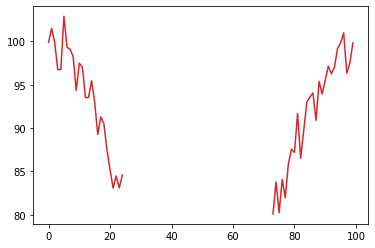

In [28]:
plot_temp = temp.copy()
plot_temp[~good_heat_index] = np.nan
plt.plot(plot_temp, 'tab:red');

## Indexing using arrays of indices

You can also use a list or array of indices to extract particular values--this is a natural extension of the regular indexing. For instance, just as we can select the first element:

In [29]:
temp[0]

99.89825854468695

We can also extract the first, fifth, and tenth elements as a list:

In [30]:
temp[[0, 4, 9]]

array([99.89825854, 96.77980233, 94.33916721])

One of the ways this comes into play is trying to sort NumPy arrays using `argsort`. This function returns the indices of the array that give the items in sorted order. So for our `temp`,

In [31]:
inds = np.argsort(temp)
inds

array([52, 57, 42, 48, 54, 44, 56, 51, 49, 43, 50, 46, 58, 55, 53, 40, 37,
       61, 47, 45, 59, 39, 36, 60, 41, 34, 66, 63, 35, 38, 32, 62, 64, 33,
       31, 67, 29, 28, 68, 69, 65, 30, 27, 70, 71, 72, 25, 26, 73, 75, 77,
       21, 23, 74, 76, 22, 24, 20, 78, 82, 80, 19, 79, 16, 83, 18, 87, 17,
       81, 84, 15, 12, 13, 85, 89, 86,  9, 88, 14, 90, 92, 97,  3,  4, 93,
       11, 91, 10, 98,  8,  7, 94,  6, 95, 99,  0,  2, 96,  1,  5])

i.e., our lowest value is at index `52`, next `57`, and so on. We can use this array of indices as an index for `temp`,

In [32]:
temp[inds]

array([ 58.71828204,  58.85269149,  59.01276068,  59.11344716,
        59.25186164,  59.31602671,  59.42796381,  59.91513049,
        60.16652571,  60.31180935,  60.48608715,  60.76695309,
        60.93380275,  60.95814392,  61.07199963,  61.1341411 ,
        61.42277612,  62.27369636,  62.44927684,  62.84580454,
        63.37573713,  64.10549575,  64.43329229,  64.95696914,
        65.70826448,  66.77179678,  67.06954335,  67.39853293,
        67.7453367 ,  68.97505745,  69.2797517 ,  69.34620461,
        69.51784389,  70.23351938,  72.45316175,  72.69583703,
        72.72814762,  73.95971516,  74.03576453,  74.45775806,
        75.009292  ,  75.11976794,  75.87151534,  76.36021141,
        76.87557425,  77.25668992,  77.84272747,  79.1435589 ,
        80.09599544,  80.24073197,  81.95065202,  83.07572989,
        83.09552107,  83.77789358,  84.07629059,  84.47998158,
        84.59037269,  85.19793004,  85.84827794,  86.51474577,
        87.19572063,  87.46048995,  87.56967086,  89.27

to get a sorted array back!

With some clever slicing, we can pull out the last 10, or 10 highest, values of `temp`,

In [33]:
ten_highest = inds[-10:]
print(temp[ten_highest])

[ 99.09533591  99.17773618  99.34603239  99.83571708  99.83593609
  99.89825854  99.90028363 100.99586742 101.52313905 102.91468564]


There are other NumPy `arg` functions that return indices for operating; check out the [NumPy docs](https://numpy.org/doc/stable/reference/routines.sort.html) on sorting your arrays!

---

## Summary
In this notebook we introduced the power of understanding the dimensions of our data by specifying math along `axis`, used `True` and `False` values to subset our data according to conditions, and used lists of positions within our array to sort our data.

### What's Next
Taking some time to practice this is valuable to be able to quickly manipulate arrays of information in useful or scientific ways.

## Resources and references
The [NumPy Users Guide](https://numpy.org/devdocs/user/quickstart.html#less-basic) expands further on some of these topics, as well as suggests various [Tutorials](https://numpy.org/learn/), lectures, and more at this stage.